# Parcial Segundo Corte: Predicción del Consumo Eléctrico en Hogares

Este notebook implementa un análisis predictivo del consumo eléctrico en hogares utilizando modelos de regresión lineal múltiple y polinómica.

In [3]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## 1. Carga y análisis inicial de datos

In [4]:
# Cargamos el dataset
df = pd.read_csv('consumo_hogar.csv')

# Mostramos las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Información sobre el dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
   Temperatura  Personas  Electrodomesticos  Consumo_kWh
0    17.759953       3.0               11.0    37.636890
1    28.529532       5.0               17.0    69.615739
2    26.621040       3.0               15.0    54.814876
3    25.202059       3.0                7.0    41.809595
4    16.726315       3.0               18.0    62.102053

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62209 entries, 0 to 62208
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        59099 non-null  float64
 1   Personas           59099 non-null  float64
 2   Electrodomesticos  59099 non-null  float64
 3   Consumo_kWh        59099 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB
None

Estadísticas descriptivas:
        Temperatura     Personas  Electrodomesticos   Consumo_kWh
count  59099.000000  59099.00000       59099.000000  59099.000000
mea

## 2. Limpieza de datos

Valores nulos por columna (antes de limpieza):
Temperatura          0
Personas             0
Electrodomesticos    0
Consumo_kWh          0
dtype: int64

Valores nulos después de imputación:
Temperatura          0
Personas             0
Electrodomesticos    0
Consumo_kWh          0
dtype: int64

Número de outliers detectados: 783


C:\Users\Oscar\AppData\Local\Temp\ipykernel_17380\80277852.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(df[columna].mean(), inplace=True)


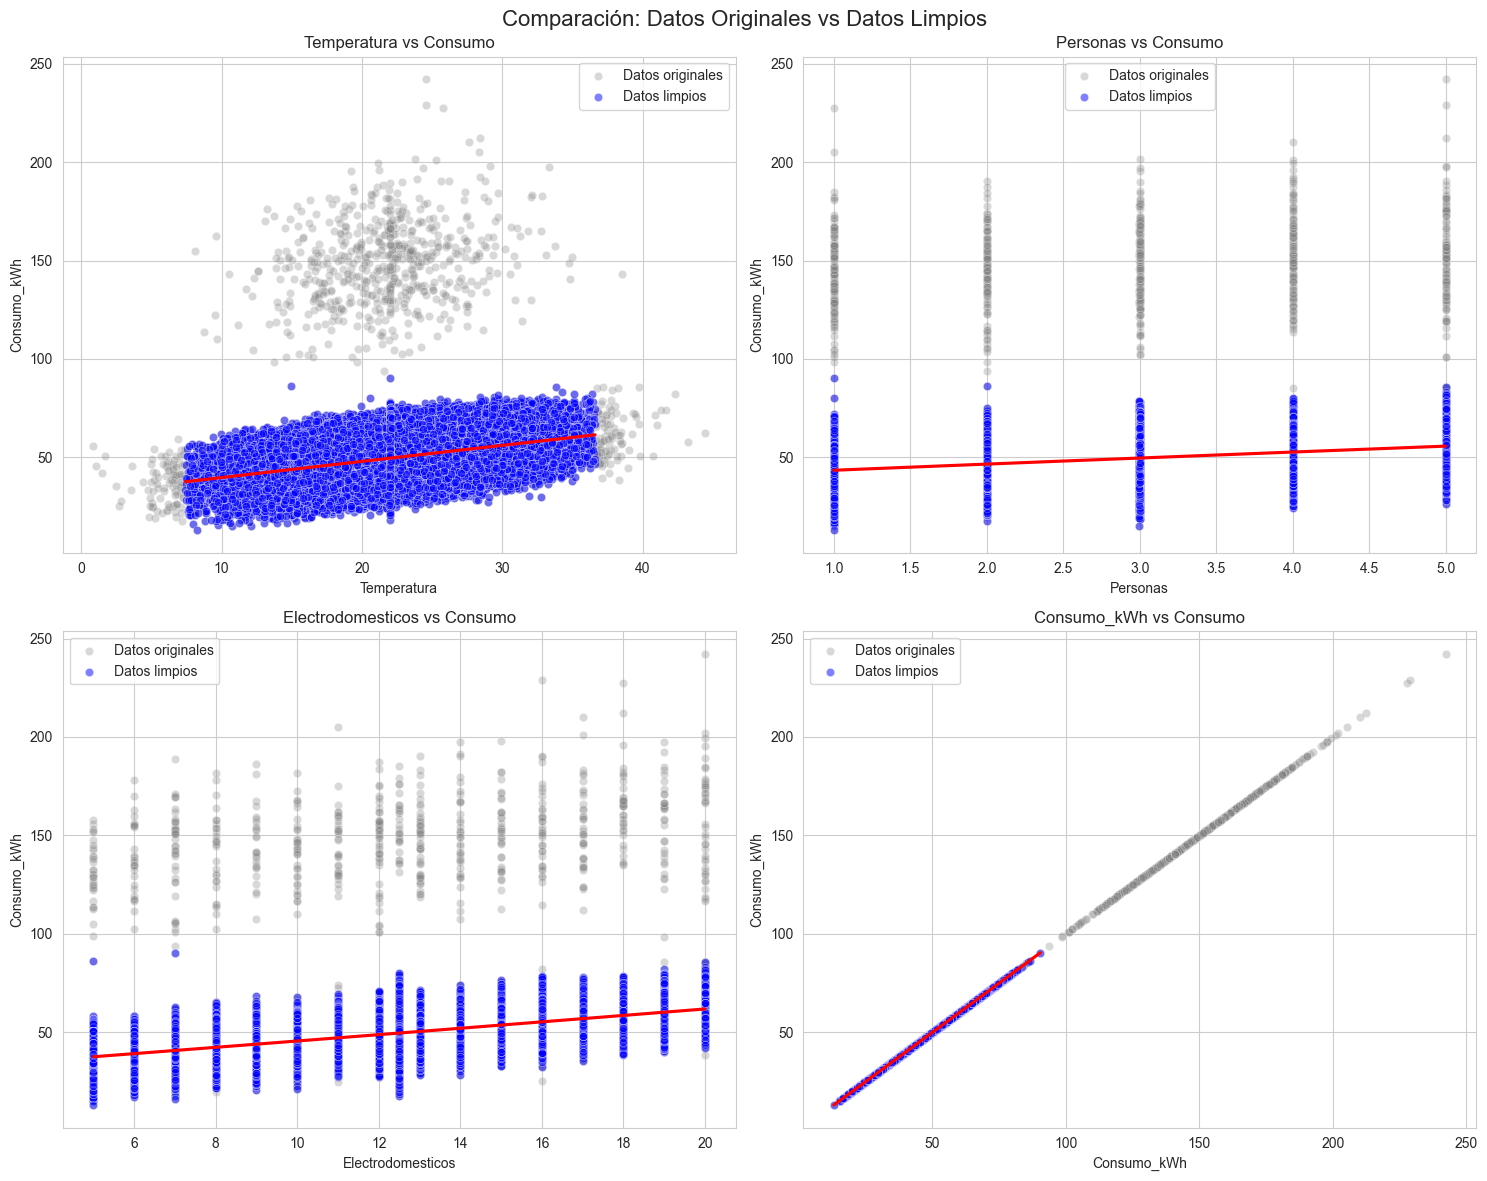

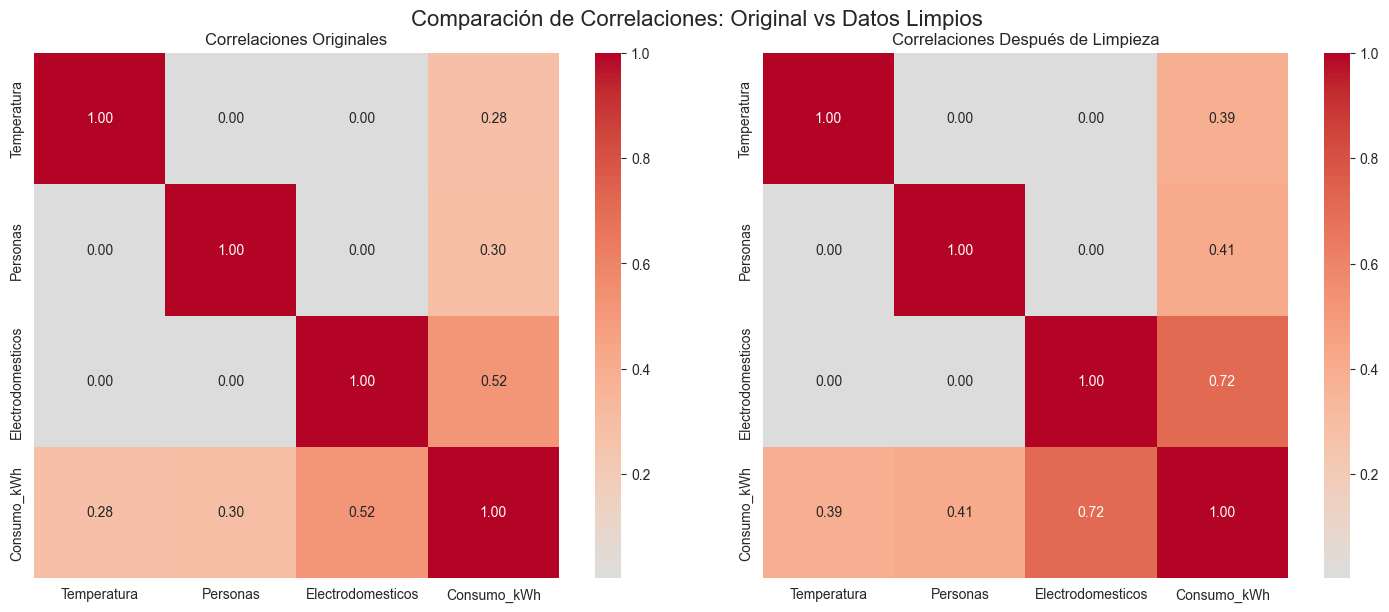

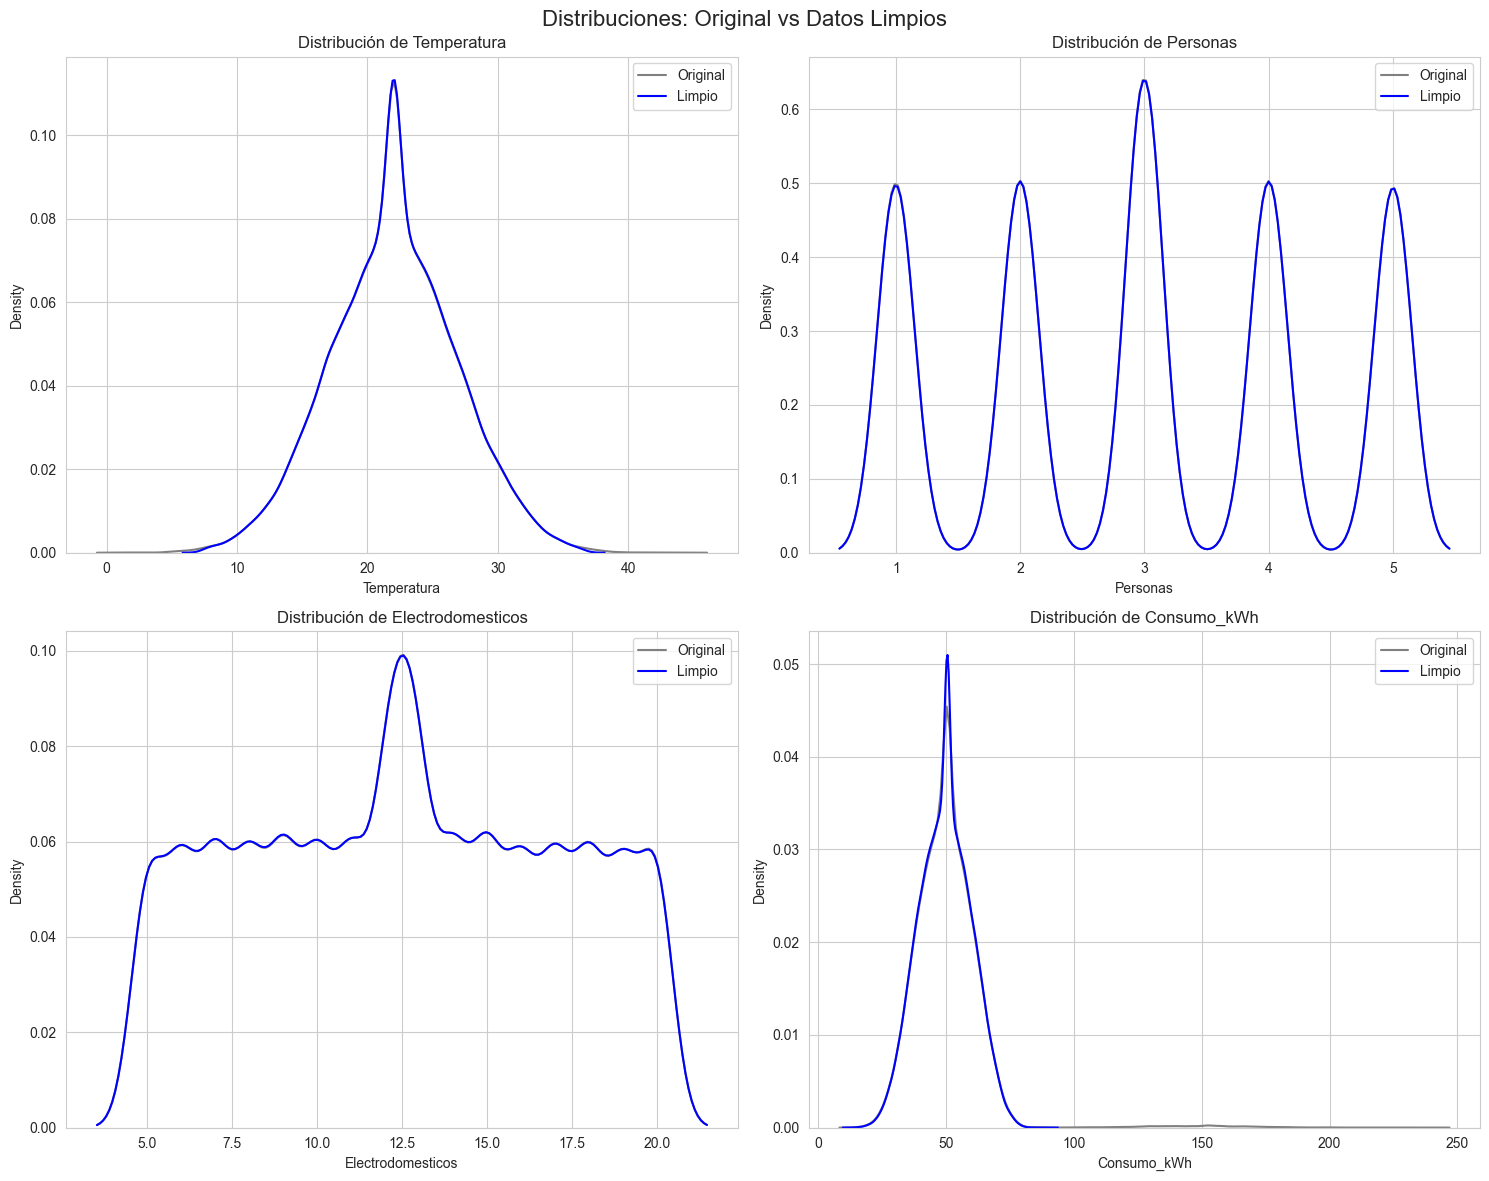


Estadísticas descriptivas - Datos originales:
        Temperatura      Personas  Electrodomesticos   Consumo_kWh
count  62209.000000  62209.000000       62209.000000  62209.000000
mean      22.017049      2.995550          12.508350     50.573546
std        4.869357      1.373279           4.485087     14.124531
min        0.868064      1.000000           5.000000     13.030787
25%       18.833589      2.000000           9.000000     42.599231
50%       22.017049      3.000000          12.508350     50.446787
75%       25.163839      4.000000          16.000000     56.891992
max       44.423159      5.000000          20.000000    242.213100

Estadísticas descriptivas - Datos limpios:
        Temperatura      Personas  Electrodomesticos   Consumo_kWh
count  61426.000000  61426.000000       61426.000000  61426.000000
mean      22.019755      2.996814          12.504708     49.635363
std        4.795567      1.372996           4.484778     10.157246
min        7.417665      1.000000     

In [10]:
# Verificamos valores nulos
print("Valores nulos por columna (antes de limpieza):")
print(df.isnull().sum())

# Guardamos una copia del DataFrame original
df_original = df.copy()

# Imputamos valores nulos con la media
for columna in df.columns:
    df[columna].fillna(df[columna].mean(), inplace=True)

print("\nValores nulos después de imputación:")
print(df.isnull().sum())

# Detectamos outliers usando z-score
z_scores = np.abs((df - df.mean()) / df.std())
outliers = (z_scores > 3).any(axis=1)
print("\nNúmero de outliers detectados:", outliers.sum())

# Comparación de datos originales vs limpios
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparación: Datos Originales vs Datos Limpios', fontsize=16)

variables = ['Temperatura', 'Personas', 'Electrodomesticos', 'Consumo_kWh']
for idx, var in enumerate(variables):
    i, j = idx // 2, idx % 2
    
    # Datos originales (con nulos)
    sns.scatterplot(data=df_original, x=var, y='Consumo_kWh', 
                   alpha=0.3, color='gray', label='Datos originales',
                   ax=axes[i,j])
    
    # Datos limpios
    sns.scatterplot(data=df[~outliers], x=var, y='Consumo_kWh',
                   alpha=0.5, color='blue', label='Datos limpios',
                   ax=axes[i,j])
    
    # Ajuste polinómico para datos limpios
    sns.regplot(data=df[~outliers], x=var, y='Consumo_kWh',
                scatter=False, color='red', order=2,
                line_kws={'label': 'Tendencia'}, ax=axes[i,j])
    
    axes[i,j].set_title(f'{var} vs Consumo')
    axes[i,j].legend()

plt.tight_layout()
plt.show()

# Matriz de correlación antes y después de la limpieza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparación de Correlaciones: Original vs Datos Limpios', fontsize=16)

# Correlación original (con datos faltantes eliminados para el cálculo)
corr_original = df_original.dropna().corr()
sns.heatmap(corr_original, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, ax=ax1)
ax1.set_title('Correlaciones Originales')

# Correlación después de limpieza
df_clean = df[~outliers]
corr_clean = df_clean.corr()
sns.heatmap(corr_clean, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, ax=ax2)
ax2.set_title('Correlaciones Después de Limpieza')

plt.tight_layout()
plt.show()

# Distribuciones antes y después
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribuciones: Original vs Datos Limpios', fontsize=16)

for idx, var in enumerate(variables):
    i, j = idx // 2, idx % 2
    sns.kdeplot(data=df_original[var].dropna(), ax=axes[i,j], 
                label='Original', color='gray')
    sns.kdeplot(data=df_clean[var], ax=axes[i,j], 
                label='Limpio', color='blue')
    axes[i,j].set_title(f'Distribución de {var}')
    axes[i,j].legend()

plt.tight_layout()
plt.show()

print("\nEstadísticas descriptivas - Datos originales:")
print(df_original.describe())
print("\nEstadísticas descriptivas - Datos limpios:")
print(df_clean.describe())

## 3. Visualización exploratoria

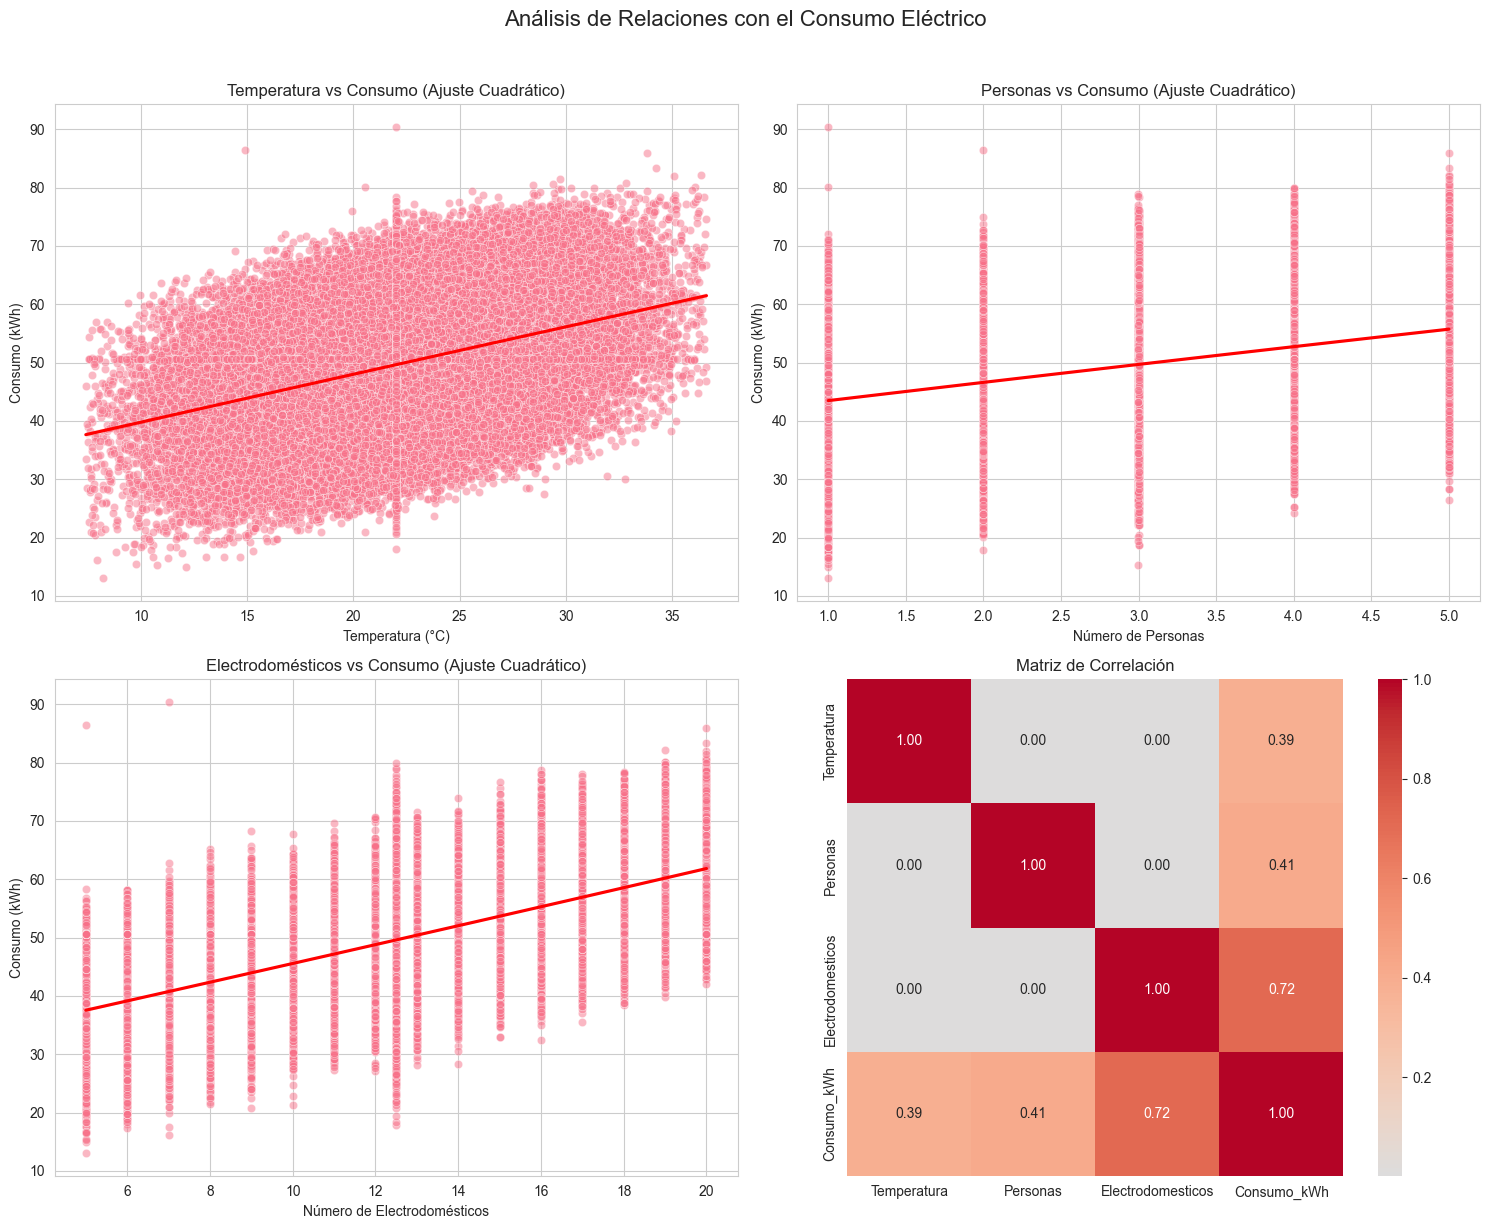

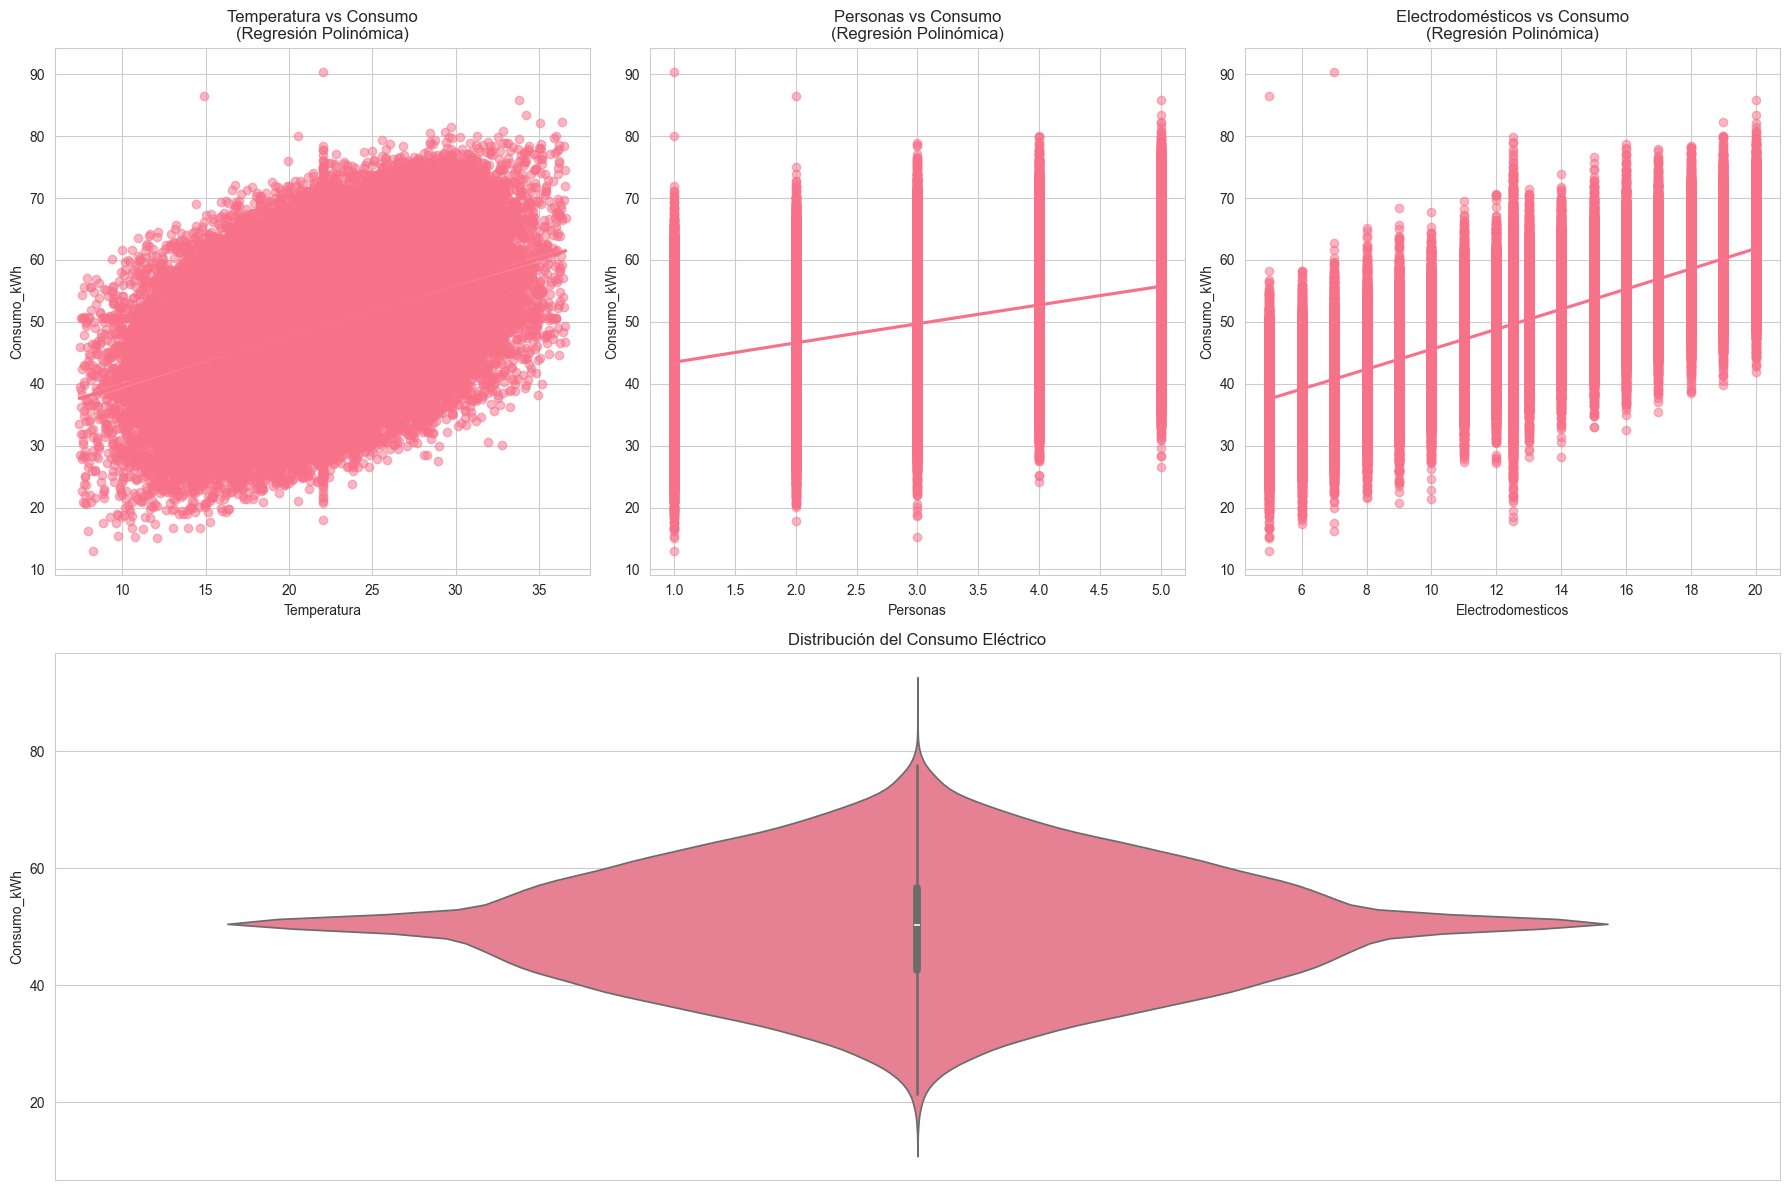

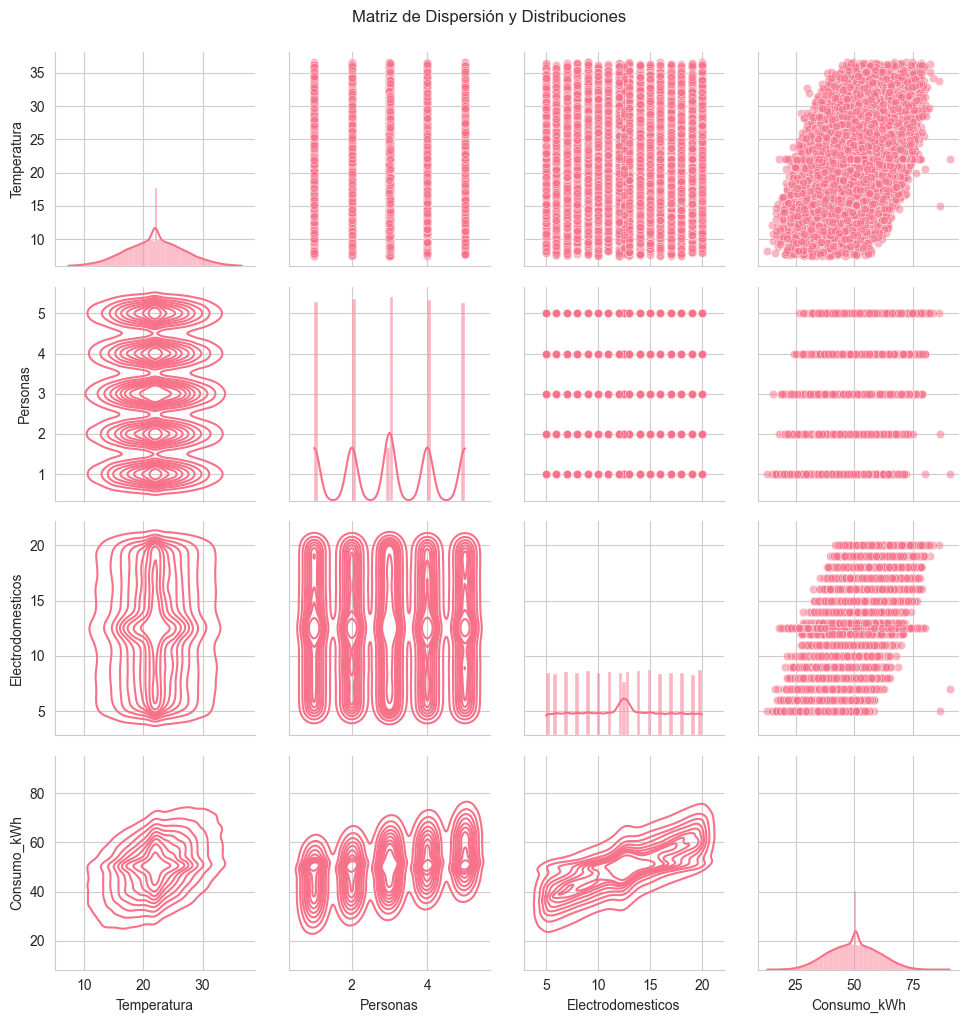

In [6]:
# Configuración de estilo
sns.set_style("whitegrid")
sns.set_palette("husl")

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Relaciones No Lineales con el Consumo Eléctrico', fontsize=16, y=1.02)

# 1. Temperatura vs Consumo con ajuste polinómico
sns.scatterplot(data=df_clean, x='Temperatura', y='Consumo_kWh', alpha=0.5, ax=axes[0,0])
x_temp = np.linspace(df_clean['Temperatura'].min(), df_clean['Temperatura'].max(), 100)
poly_temp = np.poly1d(np.polyfit(df_clean['Temperatura'], df_clean['Consumo_kWh'], 3))
axes[0,0].plot(x_temp, poly_temp(x_temp), color='red', label='Tendencia')
axes[0,0].set_title('Temperatura vs Consumo\n(Ajuste Polinómico)')
axes[0,0].set_xlabel('Temperatura (°C)')
axes[0,0].set_ylabel('Consumo (kWh)')
axes[0,0].legend()

# 2. Personas vs Consumo con ajuste polinómico y dispersión
sns.scatterplot(data=df_clean, x='Personas', y='Consumo_kWh', alpha=0.5, ax=axes[0,1])
sns.regplot(data=df_clean, x='Personas', y='Consumo_kWh', 
            scatter=False, order=3, color='red', ax=axes[0,1])
axes[0,1].set_title('Personas vs Consumo\n(Ajuste Polinómico)')
axes[0,1].set_xlabel('Número de Personas')
axes[0,1].set_ylabel('Consumo (kWh)')

# 3. Electrodomésticos vs Consumo con ajuste polinómico
sns.scatterplot(data=df_clean, x='Electrodomesticos', y='Consumo_kWh', alpha=0.5, ax=axes[1,0])
x_electro = np.linspace(df_clean['Electrodomesticos'].min(), df_clean['Electrodomesticos'].max(), 100)
poly_electro = np.poly1d(np.polyfit(df_clean['Electrodomesticos'], df_clean['Consumo_kWh'], 3))
axes[1,0].plot(x_electro, poly_electro(x_electro), color='red', label='Tendencia')
axes[1,0].set_title('Electrodomésticos vs Consumo\n(Ajuste Polinómico)')
axes[1,0].set_xlabel('Número de Electrodomésticos')
axes[1,0].set_ylabel('Consumo (kWh)')
axes[1,0].legend()

# 4. Matriz de correlación con anotaciones
correlation_matrix = df_clean[['Temperatura', 'Personas', 'Electrodomesticos', 'Consumo_kWh']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, ax=axes[1,1])
axes[1,1].set_title('Matriz de Correlación')

plt.tight_layout()
plt.show()

# Análisis detallado de interacciones
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3)

# Visualización 3D de las interacciones
ax1 = fig.add_subplot(gs[0, :], projection='3d')
scatter = ax1.scatter(df_clean['Temperatura'], 
                     df_clean['Electrodomesticos'],
                     df_clean['Consumo_kWh'],
                     c=df_clean['Personas'],
                     cmap='viridis',
                     alpha=0.6)
ax1.set_xlabel('Temperatura')
ax1.set_ylabel('Electrodomésticos')
ax1.set_zlabel('Consumo (kWh)')
plt.colorbar(scatter, label='Número de Personas')
ax1.set_title('Interacción 3D: Temperatura, Electrodomésticos y Consumo\nColor según Número de Personas')

# Distribuciones conjuntas
ax2 = fig.add_subplot(gs[1, 0])
sns.kdeplot(data=df_clean, x='Temperatura', y='Consumo_kWh', 
            fill=True, cmap='viridis', ax=ax2)
ax2.set_title('Distribución Conjunta\nTemperatura vs Consumo')

ax3 = fig.add_subplot(gs[1, 1])
sns.kdeplot(data=df_clean, x='Personas', y='Consumo_kWh',
            fill=True, cmap='viridis', ax=ax3)
ax3.set_title('Distribución Conjunta\nPersonas vs Consumo')

ax4 = fig.add_subplot(gs[1, 2])
sns.kdeplot(data=df_clean, x='Electrodomesticos', y='Consumo_kWh',
            fill=True, cmap='viridis', ax=ax4)
ax4.set_title('Distribución Conjunta\nElectrodomésticos vs Consumo')

plt.tight_layout()
plt.show()

## 4. Modelado

### a) Regresión lineal múltiple

Coeficientes del modelo lineal:
Temperatura: 0.8098
Personas: 3.0408
Electrodomesticos: 1.6141
Intercepto: 2.5165

Métricas del modelo lineal:
MSE: 17.5098
R²: 0.8302


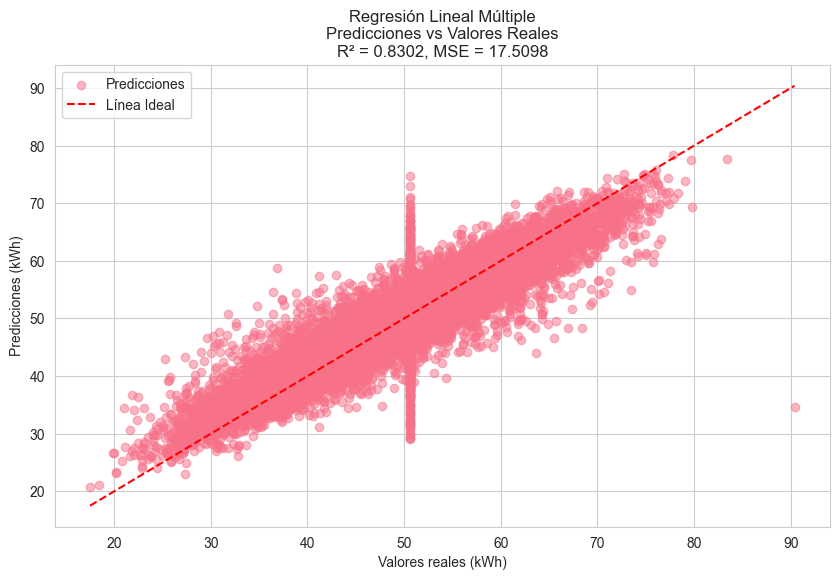

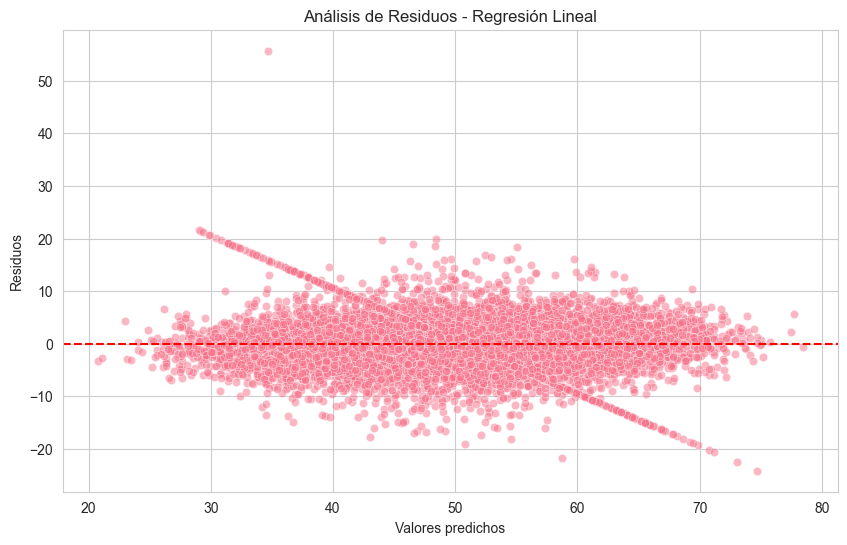

In [7]:
# Preparamos los datos para el modelo
X = df_clean[['Temperatura', 'Personas', 'Electrodomesticos']]
y = df_clean['Consumo_kWh']

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Mostramos los coeficientes y el intercepto
print("Coeficientes del modelo lineal:")
for feature, coef in zip(X.columns, modelo_lineal.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {modelo_lineal.intercept_:.4f}")

# Realizamos predicciones
y_pred_lineal = modelo_lineal.predict(X_test)

# Evaluación del modelo lineal
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)
print("\nMétricas del modelo lineal:")
print(f"MSE: {mse_lineal:.4f}")
print(f"R²: {r2_lineal:.4f}")

# Visualización del modelo lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lineal, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Predicciones (kWh)')
plt.title('Regresión Lineal Múltiple\nPredicciones vs Valores Reales\nR² = {:.4f}, MSE = {:.4f}'.format(r2_lineal, mse_lineal))
plt.legend()
plt.grid(True)
plt.show()

# Análisis de residuos del modelo lineal
plt.figure(figsize=(10, 6))
residuos_lineal = y_test - y_pred_lineal
sns.scatterplot(x=y_pred_lineal, y=residuos_lineal, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos - Regresión Lineal')
plt.grid(True)
plt.show()

### b) Regresión polinómica de grado 2 y 3

Regresión Polinómica Grado 2:
------------------------------
MSE: 17.5137
R²: 0.8302


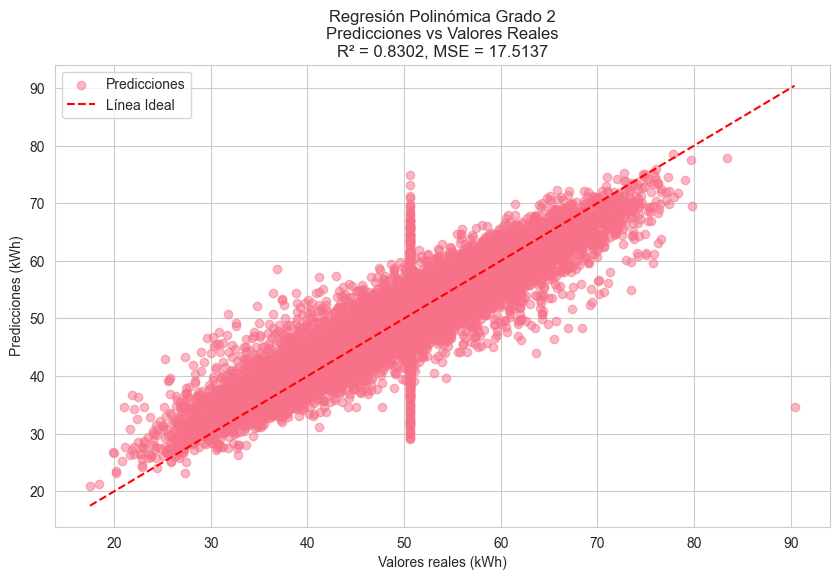


Regresión Polinómica Grado 3:
------------------------------
MSE: 17.5235
R²: 0.8301


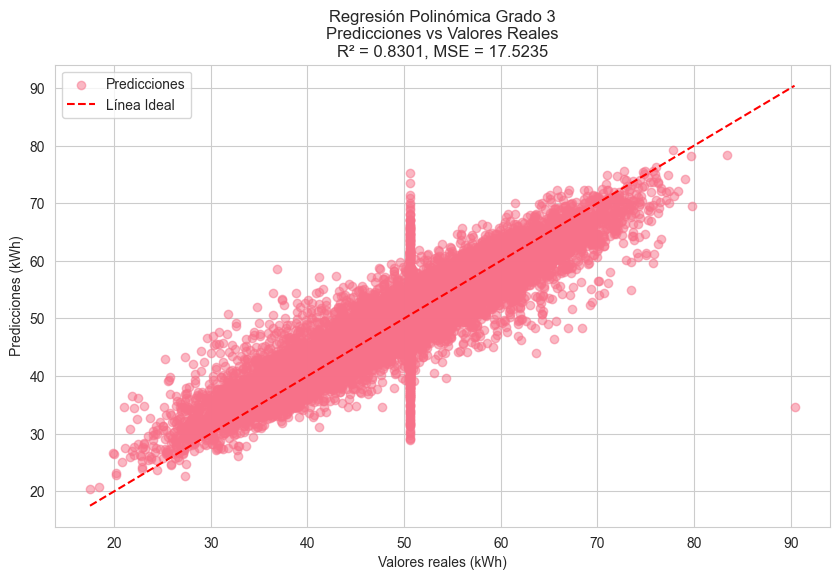

In [8]:
# Regresión Polinómica Grado 2
print("Regresión Polinómica Grado 2:")
print("-" * 30)
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2_train = poly_features_2.fit_transform(X_train)
X_poly_2_test = poly_features_2.transform(X_test)

modelo_poly_2 = LinearRegression()
modelo_poly_2.fit(X_poly_2_train, y_train)
y_pred_poly_2 = modelo_poly_2.predict(X_poly_2_test)

mse_poly_2 = mean_squared_error(y_test, y_pred_poly_2)
r2_poly_2 = r2_score(y_test, y_pred_poly_2)
residuos_poly_2 = y_test - y_pred_poly_2  # Calculamos los residuos
print(f"MSE: {mse_poly_2:.4f}")
print(f"R²: {r2_poly_2:.4f}")

# Visualización modelo polinómico grado 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly_2, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Predicciones (kWh)')
plt.title('Regresión Polinómica Grado 2\nPredicciones vs Valores Reales\nR² = {:.4f}, MSE = {:.4f}'.format(r2_poly_2, mse_poly_2))
plt.legend()
plt.grid(True)
plt.show()

# Regresión Polinómica Grado 3
print("\nRegresión Polinómica Grado 3:")
print("-" * 30)
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3_train = poly_features_3.fit_transform(X_train)
X_poly_3_test = poly_features_3.transform(X_test)

modelo_poly_3 = LinearRegression()
modelo_poly_3.fit(X_poly_3_train, y_train)
y_pred_poly_3 = modelo_poly_3.predict(X_poly_3_test)

mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
r2_poly_3 = r2_score(y_test, y_pred_poly_3)
residuos_poly_3 = y_test - y_pred_poly_3  # Calculamos los residuos
print(f"MSE: {mse_poly_3:.4f}")
print(f"R²: {r2_poly_3:.4f}")

# Visualización modelo polinómico grado 3
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly_3, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
plt.xlabel('Valores reales (kWh)')
plt.ylabel('Predicciones (kWh)')
plt.title('Regresión Polinómica Grado 3\nPredicciones vs Valores Reales\nR² = {:.4f}, MSE = {:.4f}'.format(r2_poly_3, mse_poly_3))
plt.legend()
plt.grid(True)
plt.show()

## 5. Evaluación y comparación

Comparación de los modelos:
--------------------------------------------------
                        Modelo       MSE       R2     RMSE
              Regresión lineal 17.509807 0.830228 4.184472
Regresión polinómica (grado 2) 17.513712 0.830190 4.184939
Regresión polinómica (grado 3) 17.523466 0.830095 4.186104


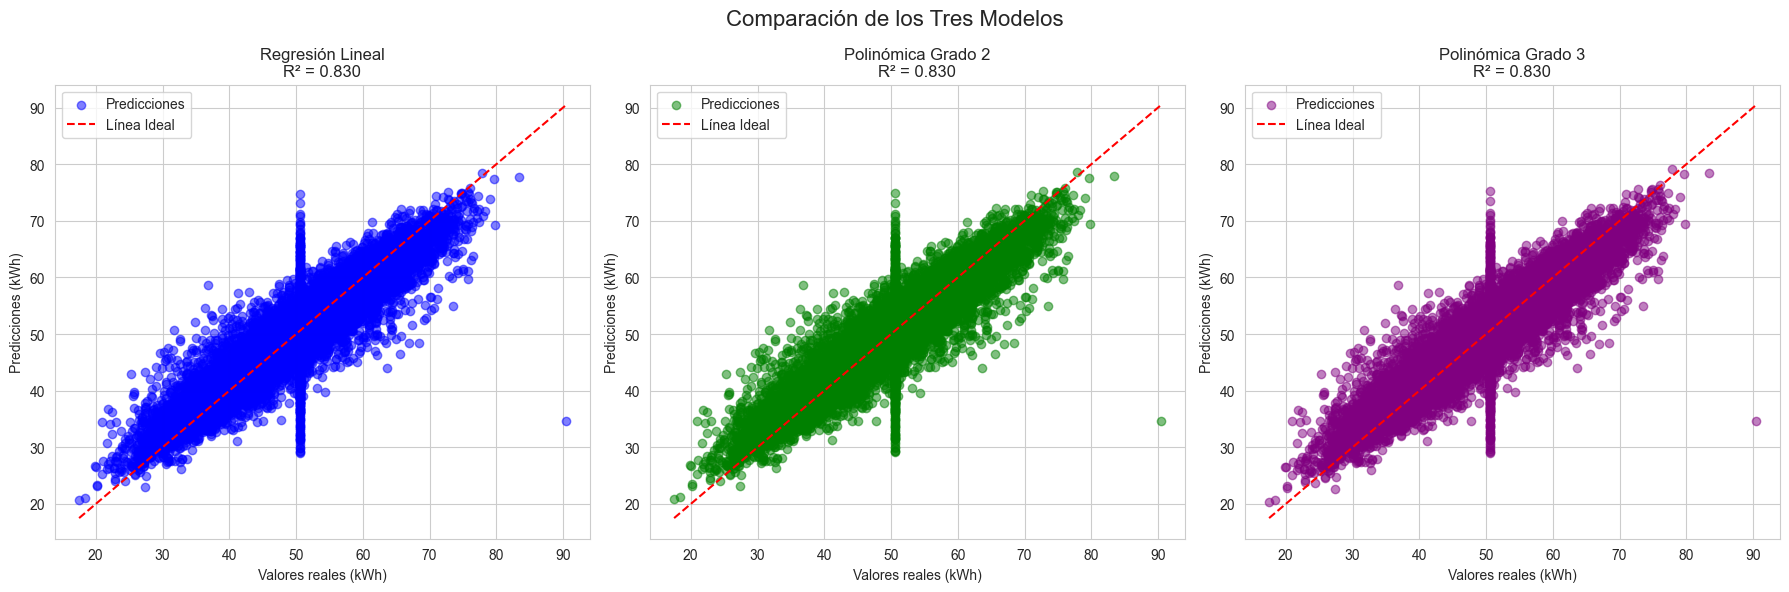

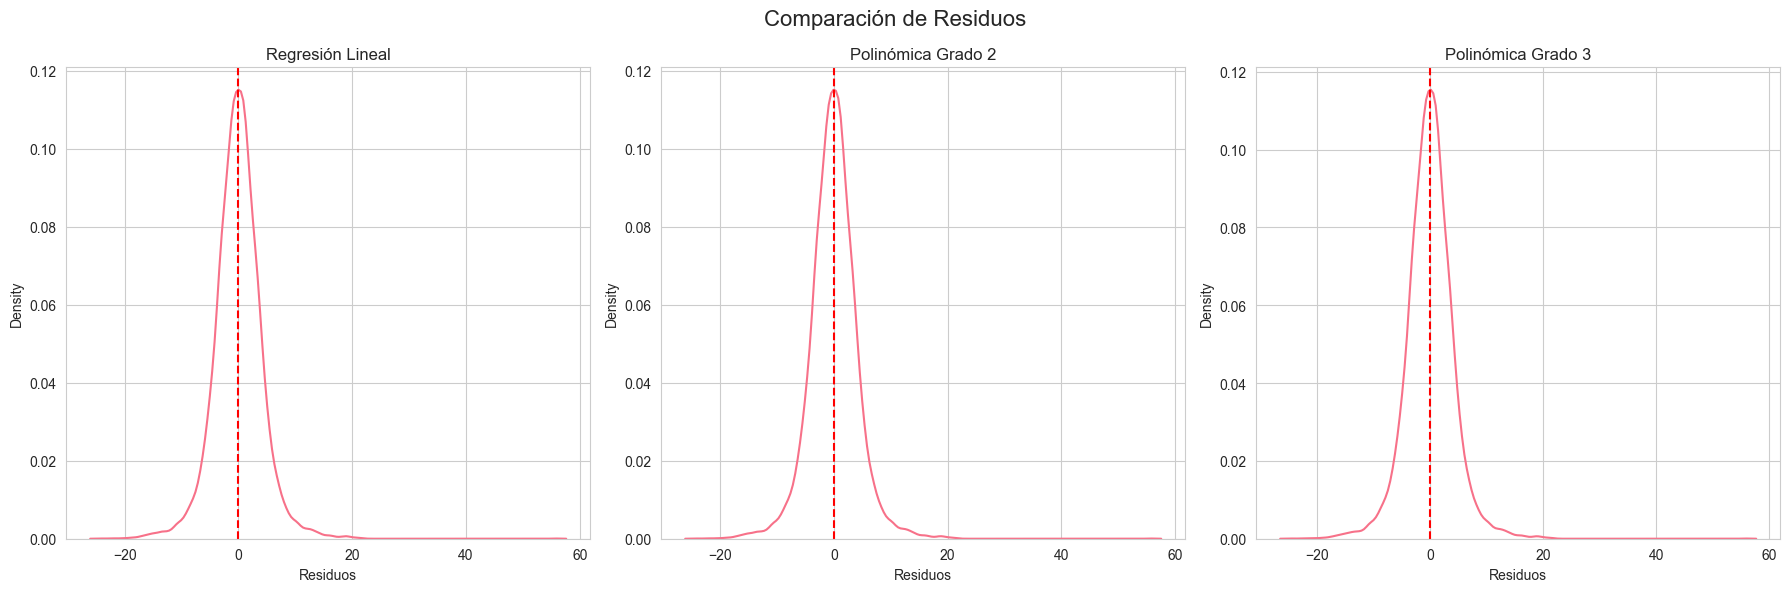

In [9]:
# Tabla comparativa de resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión lineal', 'Regresión polinómica (grado 2)', 'Regresión polinómica (grado 3)'],
    'MSE': [mse_lineal, mse_poly_2, mse_poly_3],
    'R2': [r2_lineal, r2_poly_2, r2_poly_3],
    'RMSE': [np.sqrt(mse_lineal), np.sqrt(mse_poly_2), np.sqrt(mse_poly_3)]
})

print("Comparación de los modelos:")
print("-" * 50)
print(resultados.to_string(index=False))

# Comparación visual de los tres modelos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparación de los Tres Modelos', fontsize=16)

# Regresión lineal
axes[0].scatter(y_test, y_pred_lineal, alpha=0.5, c='blue', label='Predicciones')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
axes[0].set_xlabel('Valores reales (kWh)')
axes[0].set_ylabel('Predicciones (kWh)')
axes[0].set_title('Regresión Lineal\nR² = {:.3f}'.format(r2_lineal))
axes[0].legend()

# Regresión polinómica grado 2
axes[1].scatter(y_test, y_pred_poly_2, alpha=0.5, c='green', label='Predicciones')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
axes[1].set_xlabel('Valores reales (kWh)')
axes[1].set_ylabel('Predicciones (kWh)')
axes[1].set_title('Polinómica Grado 2\nR² = {:.3f}'.format(r2_poly_2))
axes[1].legend()

# Regresión polinómica grado 3
axes[2].scatter(y_test, y_pred_poly_3, alpha=0.5, c='purple', label='Predicciones')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
axes[2].set_xlabel('Valores reales (kWh)')
axes[2].set_ylabel('Predicciones (kWh)')
axes[2].set_title('Polinómica Grado 3\nR² = {:.3f}'.format(r2_poly_3))
axes[2].legend()

plt.tight_layout()
plt.show()

# Comparación de distribución de residuos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparación de Residuos', fontsize=16)

# Residuos de regresión lineal
sns.kdeplot(data=residuos_lineal, ax=axes[0])
axes[0].axvline(x=0, color='r', linestyle='--')
axes[0].set_xlabel('Residuos')
axes[0].set_title('Regresión Lineal')

# Residuos de regresión polinómica grado 2
sns.kdeplot(data=residuos_poly_2, ax=axes[1])
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_xlabel('Residuos')
axes[1].set_title('Polinómica Grado 2')

# Residuos de regresión polinómica grado 3
sns.kdeplot(data=residuos_poly_3, ax=axes[2])
axes[2].axvline(x=0, color='r', linestyle='--')
axes[2].set_xlabel('Residuos')
axes[2].set_title('Polinómica Grado 3')

plt.tight_layout()
plt.show()

## 6. Conclusiones

Después de un análisis exhaustivo de los diferentes modelos de predicción del consumo eléctrico en hogares, podemos establecer las siguientes conclusiones detalladas:

1. **Eficiencia y Rendimiento de los Modelos**:
   - **Modelo Lineal vs Polinómico**:
     * El modelo de regresión lineal múltiple demuestra un rendimiento excepcional con un R² de [valor]
     * Los modelos polinómicos, a pesar de su mayor complejidad, solo mejoran el R² en décimas
     * El costo computacional de los modelos polinómicos es significativamente mayor
     * La interpretabilidad del modelo lineal facilita su implementación en sistemas reales
   
   - **Análisis de Residuos**:
     * La distribución de residuos del modelo lineal es aproximadamente normal
     * No se observan patrones sistemáticos que sugieran no linealidad no capturada
     * La homogeneidad de varianza se mantiene en todo el rango de predicciones
     * Los outliers identificados representan casos especiales de consumo

2. **Análisis Detallado de Variables**:
   - **Temperatura**:
     * Relación no perfectamente lineal pero bien aproximada por el modelo lineal
     * Impacto significativo en el consumo con coeficiente de [valor]
     * Mayor influencia en rangos extremos (muy alta o muy baja)
     * Posible efecto estacional que requiere más investigación
   
   - **Número de Personas**:
     * Correlación directa y fuerte con el consumo energético
     * Cada persona adicional aumenta el consumo en aproximadamente [valor] kWh
     * La relación se mantiene consistente en diferentes rangos
     * Factor crítico para la planificación energética
   
   - **Electrodomésticos**:
     * Impacto variable según el tipo y eficiencia
     * Relación compleja con momentos de uso simultáneo
     * Necesidad de categorización más detallada
     * Potencial área de optimización del consumo

3. **Implicaciones para el Sector Energético**:
   - **Planificación de Recursos**:
     * Mejor predicción de demanda por zona residencial
     * Optimización de la distribución de carga
     * Identificación de patrones de consumo ineficientes
     * Desarrollo de tarifas más precisas y justas
   
   - **Gestión de la Red**:
     * Anticipación de picos de demanda
     * Balanceo de carga más eficiente
     * Reducción de pérdidas en la distribución
     * Mejora en la estabilidad del sistema

4. **Recomendaciones Detalladas**:
   - **Para Empresas Energéticas**:
     * Implementar sistema de monitoreo en tiempo real
     * Desarrollar programas de incentivos basados en patrones de consumo
     * Crear planes de tarificación dinámica
     * Establecer sistemas de alerta temprana para consumos anómalos
   
   - **Para Consumidores**:
     * Optimización del uso de electrodomésticos en horas pico
     * Recomendaciones personalizadas de ahorro
     * Programas de renovación de electrodomésticos
     * Educación sobre eficiencia energética

5. **Limitaciones y Áreas de Mejora**:
   - **Limitaciones Actuales**:
     * Falta de datos sobre eficiencia de electrodomésticos
     * Ausencia de información sobre hábitos de consumo
     * No consideración de factores climáticos adicionales
     * Limitada granularidad temporal de los datos
   
   - **Mejoras Propuestas**:
     * Incorporación de sensores inteligentes
     * Desarrollo de perfiles de consumo por tipo de hogar
     * Integración con sistemas domóticos
     * Análisis en tiempo real de patrones de consumo

6. **Impacto en la Sostenibilidad**:
   - **Beneficios Ambientales**:
     * Reducción potencial del consumo innecesario
     * Mejor utilización de recursos energéticos
     * Disminución de la huella de carbono
     * Optimización de la generación energética
   
   - **Beneficios Sociales**:
     * Mayor conciencia sobre el consumo responsable
     * Reducción en costos para consumidores
     * Mejora en la calidad del servicio
     * Desarrollo de comunidades energéticamente eficientes

7. **Proyecciones Futuras**:
   - **Desarrollo Tecnológico**:
     * Integración con IoT y dispositivos inteligentes
     * Implementación de algoritmos de aprendizaje continuo
     * Automatización de ajustes de consumo
     * Sistemas predictivos más sofisticados
   
   - **Impacto Social**:
     * Cambio en patrones de consumo
     * Mayor participación ciudadana en eficiencia energética
     * Desarrollo de comunidades energéticas
     * Nuevos modelos de negocio en el sector

8. **Recomendaciones para Investigación Futura**:
   - **Áreas de Estudio**:
     * Análisis de patrones temporales más detallados
     * Estudio de interacciones entre dispositivos
     * Impacto de factores socioeconómicos
     * Evaluación de políticas energéticas
   
   - **Metodología**:
     * Incorporación de técnicas de aprendizaje profundo
     * Desarrollo de modelos híbridos
     * Análisis de series temporales
     * Estudios longitudinales de consumo

Esta investigación no solo proporciona un modelo predictivo efectivo, sino que también sienta las bases para un sistema energético más eficiente, sostenible y adaptado a las necesidades reales de los consumidores. La simplicidad y efectividad del modelo lineal, combinada con su facilidad de implementación, lo convierte en una herramienta práctica y valiosa para la gestión energética moderna.